# Project Name: Bank Customer Default Business case
# Project Code: PRCL-0015
# Client Name: Bank GoodCredit

## PROJECT GOAL:
Build a model with the data provided
1. Data exploration insights – what did you find and what decision did you take?
2. Feature matrix - List of features selected with gain 
3. Model evaluation - Gini and rank ordering

## Installing required libraries

In [ ]:
!pip install sqlalchemy
!pip install pymysql
!pip install networkx --upgrade

## Importing necessary packages

In [35]:
# For SQL

from sqlalchemy import create_engine
import pymysql

# FOR DATA PRE-PRECESSING

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import scipy

# FOR EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FEATURE EXTRACTION

import datetime

# FOR DIMENSION REDUCTION

from sklearn.decomposition import PCA

# FOR MODEL BUILTING

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# TO REMOVE WARNINGS

import warnings
warnings.filterwarnings("ignore")

# SQL

## Database Details

In [ ]:
db_Host = "18.136.157.135"
db_Port = "3306"
db_Username = "dm_team1" 
db_Password = "DM!$Team&279@20!"
db_Name = "project_banking"

## Creating a connection

In [ ]:
conn = create_engine('mysql+pymysql://'+db_Username+':'+db_Password+'@'+db_Host+'/'+db_Name)

## Displaying the table names

In [ ]:
conn.table_names()

#### There are three tables in this database so we need to retrive data from them and join them.

## Retriving data from each tables

In [ ]:
query = 'select * from Cust_Account'
Cust_Account = pd.read_sql(query,conn)
print(" The shape of table:",Cust_Account.shape)
Cust_Account.head()

In [ ]:
query = 'select * from Cust_Demographics'
Cust_Demographics = pd.read_sql(query,conn)
print(" The shape of table:",Cust_Demographics.shape)
Cust_Demographics.head()

In [ ]:
query = 'select * from Cust_Enquiry'
Cust_Enquiry = pd.read_sql(query,conn)
print(" The shape of table:",Cust_Enquiry.shape)
Cust_Enquiry.head()

### LOADING FROM CSV

In [2]:
ca = pd.read_csv('cust_acc.csv')
cd = pd.read_csv('cust_demo.csv')
ce = pd.read_csv('cust_enq.csv')
print(ca.shape)
print(cd.shape)
print(ce.shape)

(186329, 22)
(23896, 84)
(413188, 7)


#### Since the dataset is huge SQL server lost connection, therefore using csv file to load dataset.

## Merging the three dataframes using inner join

In [3]:
# Merging the first two tables

data =  pd.merge(ca, cd, on='customer_no', how='inner')

# Merging the first two tables with the third table

data =  pd.merge(data, ce, on='customer_no', how='inner')

#### SQL join cannot be used as the data is huge, therefore joining the pandas dataframe.

# DATA-PREPROCESSING

## Checking for missing values

In [4]:
data.isnull().sum().sum()

100817788

In [5]:
data = data.fillna(0)

## Checking for duplicates

In [6]:
data.duplicated().sum()

0

In [7]:
data['customer_no'].duplicated().sum()

4937882

# EDA

## Checking the dataframe

In [8]:
# To display all the columns

pd.set_option('max_columns', None)

# Viewing the dataframe

data.head(25)

,Unnamed: 0_x,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,Unnamed: 0_y,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,Unnamed: 0,dt_opened,upload_dt_y,enquiry_dt,enq_purpose,enq_amt
0,0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,0.0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",0,01-Sep-15,01-Jul-14,0.0,0.0,0,0.0,0.0,12264,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,0,0,0,Y,PM1,0,0.0,SA05,MA01,0,0,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,0,PAN Card,ASWPKXXXXX,0,0.0,N,0,0.0,0,17-Jun-16,1.0,10.0,0,N,Y,N,0,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0,0.0,0000-00-00,0.0,88009XXXXX,1.0,N,1,227985,10-Nov-15,20-Oct-15,12-Aug-15,10.0,10000.0
1,0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,0.0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",0,01-Sep-15,01-Jul-14,0.0,0.0,0,0.0,0.0,12264,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,0,0,0,Y,PM1,0,0.0,SA05,MA01,0,0,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,0,PAN Card,ASWPKXXXXX,0,0.0,N,0,0.0,0,17-Jun-16,1.0,10.0,0,N,Y,N,0,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0,0.0,0000-00-00,0.0,88009XXXXX,1.0,N,1,227986,10-Nov-15,20-Oct-15,04-Aug-15,10.0,15000.0
2,0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,0.0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",0,01-Sep-15,01-Jul-14,0.0,0.0,0,0.0,0.0,12264,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,0,0,0,Y,PM1,0,0.0,SA05,MA01,0,0,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,0,PAN Card,ASWPKXXXXX,0,0.0,N,0,0.0,0,17-Jun-16,1.0,10.0,0,N,Y,N,0,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0,0.0,0000-00-00,0.0,88009XXXXX,1.0,N,1,227987,10-Nov-15,20-Oct-15,22-Jul-15,5.0,300000.0
3,0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,0.0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",0,01-Sep-15,01-Jul-14,0.0,0.0,0,0.0,0.0,12264,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,0,0,0,Y,PM1,0,0.0,SA05,MA01,0,0,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,0,PAN Card,ASWPKXXXXX,0,0.0,N,0,0.0,0,17-Jun-16,1.0,10.0,0,N,Y,N,0,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0,0.0,0000-00-00,0.0,88009XXXXX,1.0,N,1,

## Checking the column names

In [9]:
print(data.columns.tolist())

['Unnamed: 0_x', 'dt_opened_x', 'customer_no', 'upload_dt_x', 'acct_type', 'owner_indic', 'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1', 'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'Unnamed: 0_y', 'dt_opened_y', 'entry_time', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 

## Checking the number of rows and columns

In [10]:
data.shape

(4961778, 111)

## General informations

In [11]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961778 entries, 0 to 4961777
Data columns (total 111 columns):
 #    Column               Non-Null Count    Dtype  
---   ------               --------------    -----  
 0    Unnamed: 0_x         4961778 non-null  int64  
 1    dt_opened_x          4961778 non-null  object 
 2    customer_no          4961778 non-null  int64  
 3    upload_dt_x          4961778 non-null  object 
 4    acct_type            4961778 non-null  int64  
 5    owner_indic          4961778 non-null  int64  
 6    opened_dt            4961778 non-null  object 
 7    last_paymt_dt        4961778 non-null  object 
 8    closed_dt            4961778 non-null  object 
 9    reporting_dt         4961778 non-null  object 
 10   high_credit_amt      4961778 non-null  float64
 11   cur_balance_amt      4961778 non-null  int64  
 12   amt_past_due         4961778 non-null  float64
 13   paymenthistory1      4961778 non-null  object 
 14   paymenthistory2      4961778 non

## Analysing statistical information

In [12]:
data.describe(include = "all")

,Unnamed: 0_x,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,Unnamed: 0_y,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,Unnamed: 0,dt_opened,upload_dt_y,enquiry_dt,enq_purpose,enq_amt
count,4.961778e+06,4961778,4.961778e+06,4961778,4.961778e+06,4.961778e+06,4961778,4961778.0,4961778.0,4961778,4.961778e+06,4.961778e+06,4.961778e+06,4961778,4961778.0,4961778,4961778,4.961778e+06,4.961778e+06,4961778.0,4.961778e+06,4.961778e+06,4.961778e+06,4961778,4961778,4961778,4961778.0,4.961778e+06,4.961778e+06,4961778,4.961778e+06,4.961778e+06,4961778.0,4961778.0,4961778.0,4961778,4961778,4961778.0,4.961778e+06,4961778,4961778,4961778.0,4961778.0,4.961778e+06,4961778,4961778,4961778,4961778,4961778,4.961778e+06,4.961778e+06,4961778,4961778,4.961778e+06,4.961778e+06,4.961778e+06,4961778,4961778,4.961778e+06,4.961778e+06,4961778,4961778,4961778.0,4.961778e+06,4.961778e+06,4.961778e+06,4.961778e+06,4961778,4.961778e+06,4961778.0,4961778,4961778,4961778.0,4.961778e+06,4961778,4961778.0,4.961778e+06,4961778.0,4961778,4.961778e+06,4.961778e+06,4961778.0,4961778,4961778,4961778,4961778.0,4961778,4961778,4.961778e+06,4.961778e+06,4.961778e+06,4.961778e+06,4.961778e+06,4.961778e+06,4961778,4.961778e+06,4961778,4961778.0,4.961778e+06,4961778,4.961778e+06,4961778,4.961778e+06,4961778,4.961778e+06,4.961778e+06,4961778,4961778,4961778,4.961778e+06,4.961778e+06
unique,NaN,197,NaN,75,NaN,NaN,6246,4511.0,4840.0,1877,NaN,NaN,NaN,18311,11912.0,234,235,NaN,NaN,1771.0,NaN,NaN,NaN,197,297,8,282.0,NaN,NaN,2,NaN,NaN,20.0,20.0,10.0,3,17,15.0,NaN,365,523,303.0,13.0,NaN,10610,8463,3251,3,722,NaN,NaN,11,63,NaN,NaN,NaN,6,3,NaN,NaN,10,12,5664.0,NaN,NaN,NaN,NaN,71,NaN,4473.0,6,11250,57.0,NaN,3,11.0,NaN,181.0,2,NaN,NaN,3.0,3,3,3,9.0,3,492,NaN,NaN,NaN,NaN,NaN,NaN,134,NaN,3,3.0,NaN,63,NaN,3124,NaN,3,NaN,NaN,197,76,3772,NaN,NaN
top,NaN,16-Nov-15,NaN,21-Apr-15,NaN,NaN,13-Apr-12,0.0,0.0,31-Jul-15,NaN,NaN,NaN,"""""""0000000000000000000000000000000000000000000...",0.0,01-Jul-15,01-Oct-12,NaN,NaN,0.0,NaN,NaN,NaN,16-Nov-15,28-Apr-15,Platinum Maxima,0.0,NaN,NaN,Card Setup,NaN,NaN,0.0,0.0,0.0,Y,PM1,0.0,NaN,SA03,AS03,0.0,0.0,NaN,AAZPAXXXXX,27-Dec-55,98111XXXXX,N,@GMAIL.COM,NaN,NaN,Graduate,New Delhi,NaN,NaN,NaN,Self,Y,NaN,NaN,Private Ltd. Co.,Banking/Financial Services,0.0,NaN,NaN,NaN,NaN,New Delhi,NaN,0.0,PAN Card,AAZPAXXXXX,0.0,NaN,Y,0.0,NaN,0.0,17-Jun-16,NaN,NaN,0.0,N,Y,N,0.0,Y,2010-0,NaN,NaN,NaN,NaN,NaN,NaN,0-0,NaN,R,0.0,NaN,0000-00-00,NaN,XXXXX,NaN,N,NaN,NaN,16-Nov-15,21-Apr-15,17-Mar-15,NaN,NaN
freq,NaN,107825,NaN,155891,NaN,NaN,16454,693546.0,2596307.0,298606,NaN,NaN,NaN,1208865,2715414.0,392988,139162,NaN,NaN,4324499.0,NaN,NaN,NaN,107825,50976,2251665,555449.0,NaN,NaN,4958022,NaN,NaN,4680713.0,4680713.0,4956470.0,4777768,2208629,3091744.0,NaN,1782934,257071,4652395.0,4956412.0,NaN,34847,34496,63552,4280711,2749534,NaN,NaN,2876352,2142300,NaN,NaN,NaN,2531179,4362199,NaN,NaN,1542914,2540420,1521399.0,NaN,NaN,NaN,NaN

## Checking if imbalanced

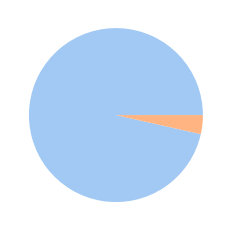

In [13]:
colors = sns.color_palette('pastel')
plt.pie(data.Bad_label.value_counts(), colors = colors)
plt.show()

In [14]:
data.Bad_label.value_counts()

0    4787256
1     174522
Name: Bad_label, dtype: int64

#### Clearly the data is imbalance so we need to do SMOTE techniques.

## Checking the unique values

In [15]:
# Not Required - nothing important

print('\npaymenthistory1\n')
print(*list(data.paymenthistory1.unique()))

print('\nPayment History 2\n')
print(*list(data.paymenthistory2.unique()))




paymenthistory1



"""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXSTD""" """000000000000000000000000000000000000000000000000000000""" """120090060060060030000000000000000000000000000000000000""" """000000000000000""" """000000000000000000""" """000000000000000000000000""" """000000000XXX000000000000030XXX000000000000000000000000""" """000900900900900900900888857829798767737706676645614584""" """000""" """000017000""" """XXX""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000000""" """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000000000000000000000000000""" """000000000000""" """000000000000000000000000000000000000000000000000""" """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDXXXSTD""" """000000000000000000000XXX000000XXX000000000XXX000000000""" """000000000000000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000000000000000000000000000000000000000""" """000000000000000000000000000000000000000000000XXXXXXXXX

 """000015015015150120090060030015000015000030015090060030""" """000000000XXX000000000000000XXXXXXXXXXXXXXX000""" """000000STDSTDSTD""" """STDSTDXXXXXXXXXXXXSTDXXXSTDSTDSTDSTDSTDSTD""" """000XXX000XXXXXXXXX000000XXX000000000000000000001000000""" """STDSTDSTDSTDSTDXXXXXXXXXSTDSTD""" """000128XXXXXXXXXXXX000038XXX000015000XXXXXXXXXXXXXXXXXX""" """000000000XXX000045012000000000000000000000000000000000""" """000000000000000000000XXX000XXX000000000XXX000XXXXXX000""" """XXXSTDSTDXXXSTDSTD""" """000000000000000000000000000000000000000015000""" """000000000000000000000018000000000000000000000000000000""" """000000000000XXXXXXXXXXXXXXXXXX000000001000000000000000""" """000000001000000000000000000000000000000001000000000000""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSTDSTDSTD""" """032002XXXXXXXXX000000000000000000000000000000000""" """000000000000XXX001000000000000000XXX000000XXX000000000""" """000XXX000000XXX000XXXXXX009""" """000169138109078049017000000000000000000000000000XXX000""" ""

"""000000XXXXXXXXXXXXXXXXXXXXXXXX000000000000000000000000""" """STDSUBXXXXXX096065034004XXXXXXSTDSTDSTDSTDSTDSTDSTDSTD""" """000000000000000000000000000000000000030000030030000000""" """025000XXX000000000000000XXXXXX000000000000000XXX000000""" """000000XXX000000000000XXX000000XXX000000000XXXXXXXXX000""" """000070040XXX000XXXXXX000038XXXXXXXXX008000000000000000""" """360329XXX268238207179XXX117087XXX057026000000000XXX000""" """000000000000XXXXXX""" """000060030001000001000000001000000000000000000000000000""" """STD001001001001001001STDSTDXXXSTD""" """000XXX001030030031030000000000000000000000000000000000""" """000000000000000048019018019000000000000000000000000000""" """000XXXXXXXXXXXX000000000000000000000000000""" """XXXXXXXXXXXXXXX001STD037006028036STDSTDSTDSTDSTDSTDSTD""" """XXXXXXXXXXXXXXXXXX001STD016000STDSTDSTDSTDSTDSTDSTDSTD""" """000000000010000000000000000000000000000000000000000000""" """XXXXXXSTDSTDXXXSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """XXXXXXXXX000XXXXXX000""" """0

 """XXX000091091XXXXXX089058030000000000000000000000000000""" """000060030000000000000000000000000000000000000000000""" """000XXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000""" """XXX090090090090060060030030030030030000000000000000000""" """STDSTDSTDSTDXXXSTDSTDSTDSTDSTDSTD""" """000000XXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000""" """000090060030015000000015000015000000000000000000000030""" """XXXXXXXXXXXXXXX000XXX000000000000000000000""" """000000000000000000000XXX000000000000000000000000000""" """STD322295260230198177XXXXXXXXXXXXXXXXXX180180180180180""" """000000000000XXX000000000000XXX000000000000000000000XXX""" """000000000024023000000024052024024022000000000000000024""" """000425394364333303272241211180180180180180180180180180""" """000000XXXXXX000000000000000000000000XXXXXXXXXXXX000000""" """000000000000000000000000000XXXXXXXXXXXXXXX000000XXXXXX""" """000900900900900900900900900900900900900900895865835805""" """000000000000000000XXX000000STDSTDSTDXXXSTDSTDSTDSTD""" """XXXXXXXXXXXXXXXXXX0

"""000000000000251220189159128098XXX039038XXXXXXXXX000000""" """000000000000025000000000000000000000000XXX000000000000""" """000000000000000000000000024000000XXXXXXXXXXXXXXXXXXXXX""" """XXX150150120090090090060030000060030000""" """000000000000XXXXXXXXX000XXX000000000000000000000000000""" """000XXX000000000000XXX000000000000000XXXXXXXXX000XXXXXX""" """132102XXX042012000XXX000000000000000000000""" """120090""" """STDSTDSTDSTDSTDSTDXXXSTDSTDXXXSTDSTDSTDSTDXXXSTDSTD107""" """000XXX312282251221190159129098068067068069067069XXX069""" """000030000000000030000030000030000000030000000""" """000000000000002000000000000000000000""" """090060XXX001000000XXX000000XXX000000000XXX000000000000""" """028XXXXXX000000000""" """000XXX000000XXXXXXXXXXXX000000000000000000000000XXX000""" """000026000000000000000000000000000000""" """000101071060120161221300360420XXX480480510510510510480""" """000355535535535535535535505475445415385355325295265235""" """STDXXXSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDXXXSTD"

 """000000000000000000000XXXXXX000000000000000000000STDSTD""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXSTDXXXSTD""" """STD014000000000000000000000000000000000""" """000XXX000000000000000000XXX000000XXX000000000000000000""" """000385355325295265235205175145115085055025000000000XXX""" """XXXXXXXXXXXXXXXXXXSTDXXXXXXSTDSTDSTDSTDSTDSTDSTD""" """000000000000XXX030000000030000000000000000000000000000""" """000000000000000000000000000000000000196165348317287263""" """000000000000000000000000STD000000000000000000000000000""" """XXXXXX000000000000XXXXXXXXXXXXXXXSTDSTDSTD""" """000SUBSUBSUBSUBSUBXXXSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """000000XXXXXX000000XXXXXX000000000000000000000000000000""" """000000341311299270239209178148117068037000000XXXXXXXXX""" """000XXXXXXXXXXXXXXXXXXXXXXXXXXX373069038""" """000000041011000000000000041010000000""" """000000016000015000015000013000000000000015000000000000""" """XXX000000000000000000000000000000XXX000XXXSTDSTDSTDSTD""" """000000064064034000000XXX000XXXXXXXXXXXX0000

"""000000000000000000XXX000000XXXXXXXXXXXXXXXSTDSTDSTDSTD""" """000000000000000000000000001000030001000030001000000000""" """000000000000021021020021020000000000000000000000000000""" """000026000000000027000000026058000000000000000000027000""" """000000000000000000000014000000000000000000000000000XXX""" """000000000000XXX000000000000000XXX000000000000""" """000XXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000030015000""" """000000000015000000000000000000000000000000015000000000""" """000000000000000000000000000000000000000000023000000""" """000000000XXX000000000000000XXX000000030030000000000000""" """000419389358328297266235205175174146115114116115084054""" """000623593563533503473XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """155XXX006""" """133XXXXXX038XXXXXXXXXXXX130""" """000205505535565535505505475505445415415385355325295265""" """000000145115085085085085085085145115085055025000025055""" """000000055055055055055055055055055055055055055055055025""" """0000300300900600300150000

 """XXXXXX000XXXXXXXXX045015XXXXXX000046015XXXXXXXXXXXX000""" """XXXXXX359329297264236206175174115XXX054010006002000000""" """000000000000000000000STD000000000000000""" """XXXXXX000000000000000000000STDSTDSTDSTDSTDSTD""" """000000000XXX000056023000000000000000000000000026000000""" """000090090090090090120120120120120090090090090090090090""" """000000141141112081080050050048047050050050081049081050""" """000092122091061062032031000XXX000000000000000000000000""" """000000000000000000000000000000000000026000000""" """000006000000000XXX000000STDSTD""" """000015000000015015000000000000000""" """STDSTDSTDSTDSTDSTDSTDSTDXXXXXX""" """213183152122091060XXX000000058030000000029000000000000""" """000XXXXXXXXXXXX000000000054022000000000000000000000000""" """000000000000000XXX000000000000024000000000000""" """000000000000000000000XXX000XXX000000000XXX000000000""" """000000000XXX000XXX000000000XXX000000000000000000000""" """000000000000000005000000000000000000000000000000000000""" """000000049XXX077

"""XXX090060030030000000000000000000""" """281250XXX007006008006008XXX007000002002002003044028XXX""" """120090060030000000000060030000XXX030000000000""" """000000000000000000000016013016016000000000000000000000""" """000000000000081081079080080082082080051020021000020000""" """000XXXXXXXXXXXXXXXXXXXXXXXX000000000000XXXXXXXXXXXXXXX""" """000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000016""" """XXX215154124092064034000000000000000000XXX000000000000""" """000000157126096065035XXX000XXX000XXXXXX000XXXXXXXXXXXX""" """000XXXXXXXXX000XXX000XXX000XXX000""" """000000000000000000000000000000000000000000000046015000""" """000000XXX000000000000026026000000000000000000000009XXX""" """000STDSTDSTDSTDSTDSTDSTD029STD031030XXX030STDSTDSTDSTD""" """000STDSTDSTDSTD030XXXSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """000062092061092061031058091061030STD029STD061030119089""" """000000000000061031000XXX031XXX061031000XXX000000000031""" """000000000005000000006000006000000000000000006000000000""" """STD033""" """XXXS

0 """000000000000000000000000000XXX000000000000000000000000""" """000000000000000000000000000000000000000000000000000000""" """000000000000000000000000000000000000""" """030000000000XXX000000000000000000000000XXX000000000""" """553523492464433402372XXX311280249219188158127099XXX007""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSTDSTDSTDSTDSTDSTDSTDSTD""" """XXXSTD""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """STD""" """XXX000000000000000000000000000000000000000000000000000""" """000000000000000000000""" """000000000000000000000000000000000000000000000""" """000000000000000000000000000000000000000000000000000XXX""" """000000XXX000000XXX000XXX000000000XXXXXX000000000000000""" """XXXXXX000""" """XXXXXXXXXXXXXXXXXXXXXXXXSTDSTDXXXXXXSTDSTD""" """XXXXXXXXXXXXXXXXXXXXXXXX000000000""" """XXX000000000000XXX000000000000000000000000000000000000""" """000000000000000000000XXX000000000000000""" """000000000""" """XXXSTDSTDSTDSTDXX

"""XXX725XXX664602575XXX541511451XXX421362XXX329299268237""" """009103076006005005005095XXXXXXXXX066036STDSTDSTDSTDSTD""" """000000016000017000XXX000""" """000000000000000000000000000000030031000000000000000000""" """001000000000000000000000000000000000XXX000000000000000""" """000000XXX000000000000000000000000000000132131100070071""" """017000000000000000000000000000000000000000000000000000""" """XXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000XXX000000000""" """011""" """000000000000000000XXX000000000000""" """STDSTDSTDSTDSTDXXXSTDSTDXXXXXXXXXXXXXXXSTDXXXXXX""" """XXXXXXXXXXXX000000000XXX000000000000000000000000000000""" """000000000000000XXXXXXXXXXXX014000000000000000000000000""" """000000000000XXX001000000000001000000000XXX000""" """015000000000000000000000000030015015000000000000000""" """000016016000046015XXXXXXXXX000000000000000000000XXX000""" """000000000000000000000000000015000000000000000015000000""" """000000000000000XXX000XXX000000000025022025025024025024""" """000000000XXX000000X

 """000000000000000000000000000000000000000084054023000000""" """000000000000000000000000000000000XXX000000030030001000""" """090090060072042012000000000011000000000090030000030030""" """021024024023000000000000000000000000000000000000000000""" """000108109108079049018000000000000000000000139138139139""" """STDSTDSTDXXXSTDSTDSTDSTD""" """000000000000XXX000XXX000000XXX000000000000007000000XXX""" """000000000000000000000000STDSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """000XXX000000000000000000000000XXX""" """015042015000000000000015000000000""" """000000000000000000000026026000000000000000000000000000""" """090060031001000000000000000000000000000000000000000000""" """079046019000000000000000000000000000000000000000000000""" """000XXX000000000000000000000XXXXXXXXX000000""" """000000000000020000000000""" """000021000000000""" """STDSTDSTDSTDSTDSTDSTDSTDSTDXXXSTDSTDXXXXXXSTDXXXXXXSTD""" """000000000000000019000000000000000000000000000000000000""" """022021022021022022021022000000000000000000000000000

"""116086056026120090060030060030090060000""" """000015000015000000000000""" """000000000000000000000XXX000022000XXXXXXXXX000000000XXX""" """000000000XXX000000000000000000000000XXX000000""" """900900900900900900900900879849818788757726695665635604""" """XXX000060030000000000000000030000000000000030XXX000090""" """000000048000000""" """000000000000000000000000000000000XXXXXX000000030000000""" """000000000077046017000000XXX046017000017000000000046017""" """XXX000XXXXXX000000XXX000XXX000000""" """000000000000000150120090060030000""" """215186155126093066036005066035006000000000005000003006""" """515484456425394364333303272241XXX180180180180180180180""" """000000000007000000000000012000000000000XXXXXXXXXXXXXXX""" """149""" """060030001000000000000000000000000000000000000000000000""" """000030001000000000000000000000000000000030001000000000""" """027028000000000000000000000000000000000000000000000000""" """XXXSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD""" """XXXXXXXXXXXXXXXXXXXXX000XXX000000

 """000000000019000000000000000000000000000000000000000000""" """XXX000000XXX000000000000000000000000""" """000029000000000000000000000000000000000000000000000000""" """STDXXXSTDSTDXXXSTDSTDSTDSTDXXXSTDXXXXXXSTD""" """XXX000390390390390390XXX210210210210210210XXXXXX120090""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSTDSTDSTDXXXSTDSTD005005""" """000000000000000000000004000004XXXXXX000""" """000000000000000000000000000000000000000000018000""" """000000000000000000000023000000000000000000000000000000""" """000XXXXXXXXX000000XXX000000000000000000001000000000000""" """001STDXXX001""" """STDSTDSTDSTDSTDSTDSTDSTDSTDSTDXXXSTDXXXSTD""" """000239XXXXXXXXXXXXXXXXXXXXX000000000000000XXXXXXXXXXXX""" """000000000000000000000000000030000000000000""" """STDSTDSTDSTDSTDSTDXXXSTDXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000000XXXXXX000000000000000000000XXX000000000000XXX000""" """000000006000034036006XXXXXXXXXSTD""" """900900XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000000000001000000000000000000""" ""

"""000000000000017000000000000000000000000000""" """XXX000000XXXXXXXXXXXXXXX000000000000000000000000000000""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX012021022021022021022""" """000000000000000020000000000000000000000XXXXXX000000XXX""" """XXX000000000000000000000000STDSTDSTDSTDSTD""" """000000000000000000000000000027000000000000000000000000""" """000000000000000000000000000000001000000001000000000000""" """028000000000000000000000000000000000000000000""" """000000000000000000000000000000015000000000000015000000""" """023052052024000000000000000000000000000000000000000000""" """028000000000000""" """000000000000000000000000030000000000000""" """000000000000000000030XXX000000000000""" """STDSTDSTDSTDSTDSTDSTDXXXSTDXXXXXXXXXXXXXXXXXXXXXXXXXXX""" """000007000000000000000XXX034016076050000000000005""" """501470442411380349319289258227197166136104076046015016""" """000000XXX000000XXX000000000XXX030000000000000000000000""" """210180150120XXX240XXX270240XXXXXXXXXXXX090060060XXX030""" """XXXXXXXXXX

 """STDSTDSTDSTDXXXSTDSTDSTDXXXSTD""" """191160129099068038000000000000000""" """STDSTDSTDSTDSTDSTDSTDSTDXXXXXXSTDSTDSTDSTDSTD""" """606573""" """000000000083085085084084085055024000000000000000000000""" """000000000000000000000001000000000000000000000000001000""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000000000000000XXX000""" """XXXXXXXXXXXXXXXXXXXXXSTDSTDSTDSTDSTDSTD""" """000000000XXXXXX000113XXXXXXXXX000000000000000000000000""" """XXXXXX000000000000000000000XXXXXXXXXXXX000000000000000""" """XXXXXXXXXXXX000000000XXX000000000XXXXXXXXXXXXXXXXXXXXX""" """060090060030030015000000000000015000000""" """038000000000000000000000000000000000XXX000000000000000""" """000030000XXX000060030030030030030XXX000000XXX000000030""" """000000000000000000000000000000000000000000XXX000030XXX""" """026023026026024026XXXXXX000000XXX000000000000000000000""" """122091063030000000000000000""" """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX000XXX000""" """000000000000000000000000000000000030000XXX000000000000""" """82

# FEATURE SELECTION

In [16]:
df = data.drop(['dt_opened_x', 'entry_time', 'feature_2', 'upload_dt_x', 'opened_dt', 'last_paymt_dt',
       'feature_15', 'feature_16','feature_20', 'feature_21', 'feature_22', 'closed_dt', 'reporting_dt',
       'feature_24',  'feature_27','feature_28', 'feature_31','feature_36', 'feature_38', 'paymt_str_dt',
       'feature_43', 'feature_45', 'feature_46', 'feature_47','feature_48', 'feature_51','feature_53', 
       'feature_54', 'feature_63', 'feature_70', 'feature_75', 'feature_77', 'dt_opened', 'paymt_end_dt',
       'enquiry_dt', 'dt_opened_y', 'upload_dt_y', 'paymenthistory1', 'paymenthistory2', "feature_1", "feature_5", 
        "feature_11", "feature_12", "feature_15", "feature_16", "feature_20", "feature_23", "feature_24",
        "feature_27", "feature_28", "feature_32", "feature_33", "feature_36", "feature_37",
        "feature_38", "feature_43", "feature_46", "feature_47", "feature_47", "feature_50", "feature_58",
        "feature_59", "feature_60", "feature_62", "feature_72", "feature_79", "feature_8", "feature_9",
        "feature_10", "feature_13", "feature_17", "feature_18", "feature_57", "feature_61", "feature_73",
        "rateofinterest"], axis=1)
df.head()

,Unnamed: 0_x,customer_no,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,paymentfrequency,actualpaymentamount,Unnamed: 0_y,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,Unnamed: 0,enq_purpose,enq_amt
0,0,12265,6,1,20900.0,0,0.0,0.0,0.0,0.0,0.0,12264,683.0,3.0,14.0,56000.0,0.0,1.0,1.0,0.0,110059.0,2006.0,1.0,35000.0,2009.0,1.0,4.0,0.0,122001.0,0.0,0.0,1.0,10.0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,0.0,0.0,1.0,1,227985,10.0,10000.0
1,0,12265,6,1,20900.0,0,0.0,0.0,0.0,0.0,0.0,12264,683.0,3.0,14.0,56000.0,0.0,1.0,1.0,0.0,110059.0,2006.0,1.0,35000.0,2009.0,1.0,4.0,0.0,122001.0,0.0,0.0,1.0,10.0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,0.0,0.0,1.0,1,227986,10.0,15000.0
2,0,12265,6,1,20900.0,0,0.0,0.0,0.0,0.0,0.0,12264,683.0,3.0,14.0,56000.0,0.0,1.0,1.0,0.0,110059.0,2006.0,1.0,35000.0,2009.0,1.0,4.0,0.0,122001.0,0.0,0.0,1.0,10.0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,0.0,0.0,1.0,1,227987,5.0,300000.0
3,0,12265,6,1,20900.0,0,0.0,0.0,0.0,0.0,0.0,12264,683.0,3.0,14.0,56000.0,0.0,1.0,1.0,0.0,110059.0,2006.0,1.0,35000.0,2009.0,1.0,4.0,0.0,122001.0,0.0,0.0,1.0,10.0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,0.0,0.0,1.0,1,227988,5.0,160000.0
4,0,12265,6,1,20900.0,0,0.0,0.0,0.0,0.0,0.0,12264,683.0,3.0,14.0,56000.0,0.0,1.0,1.0,0.0,110059.0,2006.0,1.0,35000.0,2009.0,1.0,4.0,0.0,122001.0,0.0,0.0,1.0,10.0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,0.0,0.0,1.0,1,227989,5.0,300000.0


## PCA

In [17]:
x = df.drop(columns="Bad_label")
y = df.Bad_label

In [18]:
model = PCA()
data_pca = model.fit_transform(x)

In [19]:
model.explained_variance_ratio_

array([9.99999611e-01, 3.82691740e-07, 5.14729921e-09, 5.72296903e-10,
       1.95229147e-10, 1.17015918e-10, 5.17932017e-11, 2.81049429e-11,
       1.87837890e-11, 1.79099371e-11, 1.33136124e-11, 6.17149309e-12,
       5.86064512e-12, 9.28348046e-13, 3.71503228e-13, 1.94127445e-13,
       1.76518025e-15, 4.13417606e-16, 1.08605322e-16, 5.66377612e-17,
       6.66345840e-18, 4.21888184e-19, 8.88135042e-20, 6.54014912e-20,
       4.83852397e-20, 3.25261152e-20, 1.78186150e-20, 1.07940675e-20,
       6.48790809e-21, 3.66058488e-21, 2.42954336e-21, 1.38294702e-21,
       9.69637233e-22, 6.98823370e-22, 2.76375542e-22, 1.86972850e-22,
       1.17277810e-22, 9.89514895e-23, 2.49148211e-23, 1.57826226e-23,
       1.47174892e-23, 1.17871205e-23, 5.31631623e-24, 9.97684790e-33,
       9.97684790e-33, 9.96589836e-33])

<AxesSubplot:>

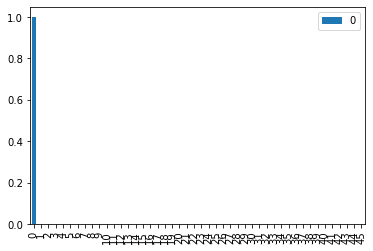

In [20]:
data_var = pd.DataFrame(model.explained_variance_ratio_)
data_var.plot(kind = "bar")

In [21]:
#data_pca = data_pca[0]
data_pca = pd.DataFrame(data_pca)
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-1.555162e+09,-1.092683e+06,-198871.973568,-13504.964817,-270328.728780,17581.615794,-121324.932895,12391.104750,20222.720200,-11233.344936,36741.706986,-91644.277596,-4153.929562,-3485.197205,106.916699,-201.280108,578.675148,-510.810703,-87.806209,17.961139,-8.699885,6.756407,2.152096,2.304120,5.483941,-1.054407,2.663092,4.837237,-0.046051,0.951986,-0.061399,-0.530734,-0.492092,0.097258,-0.071367,-0.315183,0.107215,-0.008223,0.023389,-0.033846,0.004149,0.005364,-0.000653,-2.008084e-05,-1.408485e-05,8.049581e-04
1,-1.555162e+09,-1.087683e+06,-198907.532307,-13511.145032,-270329.162497,17581.783477,-121326.508427,12389.791540,20222.700304,-11234.002511,36741.686675,-91644.235440,-4153.973509,-3485.218798,106.917986,-201.275924,578.680825,-510.890625,-87.807985,17.960894,-8.700162,6.756509,2.151991,2.304088,5.483904,-1.054390,2.663056,4.837257,-0.046036,0.951921,-0.061433,-0.530644,-0.492089,0.097256,-0.071367,-0.315182,0.107212,-0.008223,0.023390,-0.033873,0.004232,0.005376,-0.000638,2.940393e-06,5.969250e-05,3.814828e-03
2,-1.555162e+09,-8.026901e+05,-200934.329863,-13863.296383,-270349.001900,17591.097437,-121412.481749,12368.859505,20209.992272,-11275.044029,36735.668370,-91641.325852,-4156.209353,-3486.394644,107.025850,-201.073584,579.171539,-511.021085,-87.804933,17.972890,-8.697244,6.770131,-2.774592,1.417059,5.517901,-1.010587,2.667034,4.885537,-0.038651,0.946695,-0.077342,-0.533449,-0.494075,0.095341,-0.072171,-0.313903,0.105298,-0.009375,0.023700,-0.034164,0.004703,0.006217,-0.000715,-3.217171e-06,-5.794408e-05,1.559658e-03
3,-1.555162e+09,-9.426865e+05,-199938.711370,-13690.312978,-270339.386245,17586.528655,-121370.351285,12377.706048,20216.543104,-11254.788513,36738.754112,-91642.768607,-4155.118080,-3485.818547,106.972444,-201.172413,578.927330,-511.073249,-87.808607,17.967068,-8.697216,6.768421,-2.771461,1.417376,5.517755,-1.010846,2.667053,4.885258,-0.038671,0.946803,-0.077400,-0.533470,-0.494081,0.095327,-0.072158,-0.313923,0.105313,-0.009379,0.023697,-0.034130,0.004610,0.006211,-0.000730,-7.878894e-06,6.873896e-05,-1.865607e-03
4,-1.555162e+09,-8.026901e+05,-200934.331648,-13863.300733,-270349.176275,17591.106153,-121412.618606,12366.933762,20210.405696,-11274.916911,36735.841926,-91641.343941,-4156.218860,-3486.396649,107.025010,-201.072609,579.165601,-511.177767,-87.808427,17.972024,-8.697784,6.770191,-2.774583,1.417030,5.517576,-1.010569,2.666953,4.885560,-0.038628,0.946713,-0.077386,-0.533451,-0.494074,0.095342,-0.072171,-0.313904,0.105300,-0.009376,0.023700,-0.034156,0.004676,0.006213,-0.000720,-9.435322e-06,4.704779e-05,5.651686e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961773,-1.555162e+09,-8.025883e+05,-196811.073074,-9899.894433,414427.692450,7142.091862,-69393.206584,140311.748467,4186.679745,-13581.399282,-48700.852531,88614.614369,-22847.770247,-1603.898544,-324.359884,181.279506,460.614712,212.088004,-144.287634,-62.742532,13.817981,19.890204,1.871951,2.190651,-1.537632,0.572663,5.014058,-1.465965,0.027404,0.787635,1.703176,-0.230908,0.004218,0.067016,-0.069571,0.028772,-0.001839,-0.027320,-0.011928,0.034236,-0.015323,0.000470,-0.005303,4.851252e-09,1.428787e-08,1.788189e-07
4961774,-1.555162e+09,-1.052582e+06,-195033.182171,-9590.993797,414444.931767,7133.929898,-69317.919848,140328.302403,4198.215189,-13545.278643,-48695.410433,88612.045121,-22845.817895,-1602.868978,-324.455235,181.102894,460.181006,212.055319,-144.292986,-62.752595,13.818247,19.887145,1.877542,2.191219,-1.537551,0.572191,5.014136,-1.466476,0.027363,0.787702,1.703069,-0.230791,0.004212,0.066985,-0.069547,0.028739,-0.001821,-0.027326,-0.011933,0.034242,-0.015320,0.000482,-0.005300,4.849985e-09,1.428679e-08,1.787976e-07
4961775,-1.555162e+09,-1.027582e

# MODEL BUILDING

## Defining x and y

In [22]:
x = data_pca
y = df.Bad_label

## Spliting the data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=27)

## Decision Tree

In [24]:
# Initializing

model = DecisionTreeClassifier()

# Training

model.fit(x_train,y_train)

# Predicting

y_pred = model.predict(x_test)

# Testing

accuracy_score(y_test,y_pred)

0.999802490235359

In [36]:
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score = ", auc)

Gini = 2*auc -1
print("Gini = ", Gini)

ROC AUC Score =  0.9981933341829308
Gini =  0.9963866683658615


## PROJECT ANALYSIS: 
Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk. This is a Classification problem with 107 features and one target variable, Bad_label. After applting PCA dimensionality reduction on the features, and then training the model, we got accuracy of 99.9% and Gini of 99.8% using Decision Tree classifier.